In [1]:
import sys
print(sys.version)

3.10.9 | packaged by Anaconda, Inc. | (main, Mar  8 2023, 10:42:25) [MSC v.1916 64 bit (AMD64)]


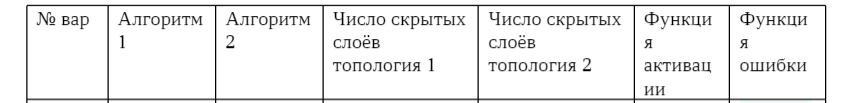

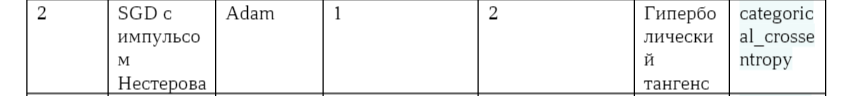

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc,ConfusionMatrixDisplay,confusion_matrix,classification_report
import tensorflow as tf

In [19]:
wine = pd.read_csv("D:\winequality-red.csv", sep=";")
data = wine[wine.columns[0:11]]
target = wine[wine.columns[11]]
for i in range(0,6):
    target =target.replace(3+i, i)
batchSize = 32;
unique=np.unique(target)
num_classes=len(unique)
unique

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\winequality-red.csv'

In [13]:
inp = tf.keras.layers.Input(shape=(11,)) 
dropout1 =  tf.keras.layers.Dropout(0.25)(inp)
hidden_1 =  tf.keras.layers.Dense(64, activation='tanh')(dropout1)
out =  tf.keras.layers.Dense(6, activation='softmax')(hidden_1)

model1Nes = tf.keras.Model(inputs=inp, outputs=out)

In [71]:
model1Nes.compile(optimizer = tf.keras.optimizers.SGD(nesterov=True),
               loss = 'categorical_crossentropy',
               metrics=['categorical_accuracy'])

In [72]:
x_train, x_test, y_train,y_test = train_test_split(data, target, random_state=1,test_size=0.2,shuffle=True)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
model1Nes.fit(x_train,y_train, epochs = 10, batch_size = batchSize,verbose = 0)

In [73]:
inp1 = tf.keras.layers.Input(shape=(11,))
dropout11 =  tf.keras.layers.Dropout(0.25)(inp1)
hidden_11 =  tf.keras.layers.Dense(64, activation='tanh')(dropout11) 
out1 =  tf.keras.layers.Dense(6, activation='softmax')(hidden_11)

model1Ad = tf.keras.Model(inputs=inp1, outputs=out1)

In [74]:
model1Ad.compile(optimizer = tf.keras.optimizers.Adam(),
               loss = 'categorical_crossentropy',
               metrics=['categorical_accuracy'])

In [75]:
model1Ad.fit(x_train,y_train, epochs = 10, batch_size = batchSize,verbose = 0)

In [76]:
inp2 = tf.keras.layers.Input(shape=(11,))
hidden_12 =  tf.keras.layers.Dense(64, activation='tanh')(inp2)
dropout12 =  tf.keras.layers.Dropout(0.25)(hidden_12)
hidden_22 =  tf.keras.layers.Dense(64, activation='tanh')(dropout12) 
out2 =  tf.keras.layers.Dense(6, activation='softmax')(hidden_22)

model2Nes = tf.keras.Model(inputs=inp2, outputs=out2)

model2Nes.compile(optimizer = tf.keras.optimizers.SGD(nesterov=True),
               loss = 'categorical_crossentropy',
               metrics=['categorical_accuracy'])

In [77]:
model2Nes.fit(x_train,y_train, epochs = 10, batch_size = batchSize,verbose = 0)

In [78]:
inp3 = tf.keras.layers.Input(shape=(11,)) 
hidden_13 =  tf.keras.layers.Dense(64, activation='tanh')(inp3)
dropout13 =  tf.keras.layers.Dropout(0.25)(hidden_13)
hidden_23 =  tf.keras.layers.Dense(64, activation='tanh')(dropout13) 
out3 =  tf.keras.layers.Dense(6, activation='softmax')(hidden_23)

model2Ad = tf.keras.Model(inputs=inp3, outputs=out3)

model2Ad.compile(optimizer = tf.keras.optimizers.Adam(),
               loss = 'categorical_crossentropy',
               metrics=['categorical_accuracy'])

In [79]:
model2Ad.fit(x_train,y_train, epochs = 10, batch_size = batchSize,verbose = 0)

In [84]:
loss_value1Nes,accuracy_value1Nes= model1Nes.evaluate(x_test,y_test,batch_size=batchSize)

loss_value1Ad,accuracy_value1Ad= model1Ad.evaluate(x_test,y_test,batch_size=batchSize)

loss_value2Nes,accuracy_value2Nes= model2Nes.evaluate(x_test,y_test,batch_size=batchSize)

loss_value2Ad,accuracy_value2Ad= model2Ad.evaluate(x_test,y_test,batch_size=batchSize)


10/10 [==============================] - 0s 3ms/step - loss: 1.0392 - categorical_accuracy: 0.5625


In [85]:
d = {'model1Nes': [loss_value1Nes, accuracy_value1Nes],
     'model1Ad':  [loss_value1Ad,  accuracy_value1Ad],
     'model2Nes': [loss_value2Nes, accuracy_value2Nes],
     'model2Ad':  [loss_value2Ad,  accuracy_value2Ad]}
df = pd.DataFrame(data=d,index=["loss_value", "accuracy_value"])
df

,model1Nes,model1Ad,model2Nes,model2Ad
loss_value,1.091105,1.086458,1.071979,1.039221
accuracy_value,0.515625,0.525000,0.525000,0.562500


In [16]:
x_train, x_test, y_train,y_test = train_test_split(data, target,test_size=0.2, shuffle=True)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

volue_of_epochs_train = pd.DataFrame(index=[
    ["1","1", "10","10", "20","20","30","30","40","40","50","50",],
    ["loss","accuracy","loss","accuracy","loss","accuracy","loss","accuracy","loss","accuracy","loss","accuracy"]
])
volue_of_epochs_test = pd.DataFrame(index=[
    ["1","1", "10","10", "20","20","30","30","40","40","50","50",],
    ["loss","accuracy","loss","accuracy","loss","accuracy","loss","accuracy","loss","accuracy","loss","accuracy"]
])
volue_of_epochs_train["model1Nes"] = None
volue_of_epochs_train["model1Ad"] = None
volue_of_epochs_train["model2Nes"] = None
volue_of_epochs_train["model2Ad"] = None
volue_of_epochs_test["model1Nes"] = None
volue_of_epochs_test["model1Ad"] = None
volue_of_epochs_test["model2Nes"] = None
volue_of_epochs_test["model2Ad"] = None
for i in range(0,6):
    j = i*10
    model1Nes.fit(x_train,y_train, epochs = j, batch_size = batchSize,verbose = 0)
    model1Ad.fit(x_train,y_train, epochs = j, batch_size = batchSize,verbose = 0)
    model2Nes.fit(x_train,y_train, epochs = j, batch_size = batchSize,verbose = 0)
    model2Ad.fit(x_train,y_train, epochs = j, batch_size = batchSize,verbose = 0)
    volue_of_epochs_train["model1Nes"][2*i], volue_of_epochs_train["model1Nes"][2*i+1] = model1Nes.evaluate(x_train,y_train,batch_size=batchSize,verbose = 0)
    volue_of_epochs_train["model1Ad"][2*i],  volue_of_epochs_train["model1Ad"][2*i+1]  = model1Ad.evaluate(x_train,y_train,batch_size=batchSize,verbose = 0)
    volue_of_epochs_train["model2Nes"][2*i], volue_of_epochs_train["model2Nes"][2*i+1] = model2Nes.evaluate(x_train,y_train,batch_size=batchSize,verbose = 0)
    volue_of_epochs_train["model2Ad"][2*i],  volue_of_epochs_train["model2Ad"][2*i+1]  = model2Ad.evaluate(x_train,y_train,batch_size=batchSize,verbose = 0)
    
    volue_of_epochs_test["model1Nes"][2*i], volue_of_epochs_test["model1Nes"][2*i+1] = model1Nes.evaluate(x_test,y_test,batch_size=batchSize,verbose = 0)
    volue_of_epochs_test["model1Ad"][2*i],  volue_of_epochs_test["model1Ad"][2*i+1]  = model1Ad.evaluate(x_test,y_test,batch_size=batchSize,verbose = 0)
    volue_of_epochs_test["model2Nes"][2*i], volue_of_epochs_test["model2Nes"][2*i+1] = model2Nes.evaluate(x_test,y_test,batch_size=batchSize,verbose = 0)
    volue_of_epochs_test["model2Ad"][2*i],  volue_of_epochs_test["model2Ad"][2*i+1]  = model2Ad.evaluate(x_test,y_test,batch_size=batchSize,verbose = 0)
print("Зависимость функции ошибки и метрики качества accuracy при обучении")
display(volue_of_epochs_train)
print("Зависимость функции ошибки и метрики качества accuracy при классификации")
display(volue_of_epochs_test)

Зависимость функции ошибки и метрики качества accuracy при обучении


model1Nes  model1Ad model2Nes  model2Ad
1  loss      1.145127  1.115098  1.121434  1.095056
   accuracy   0.48319  0.503518  0.484754  0.498045
10 loss      1.113506  1.098425  1.124017  1.001162
   accuracy    0.5043  0.518374    0.4957  0.558249
20 loss       1.11749  1.073452  1.095302  0.947091
   accuracy  0.480844  0.542611  0.508991  0.592651
30 loss      1.102865  1.046777  1.077939  0.905175
   accuracy   0.50821  0.536357  0.521501  0.605942
40 loss      1.094669  1.021215  1.060725  0.899968
   accuracy    0.5043  0.539484  0.528538  0.600469
50 loss      1.093814  1.004124  1.067178  0.848403
   accuracy  0.510555  0.553557   0.54183  0.639562

Зависимость функции ошибки и метрики качества accuracy при классификации


model1Nes  model1Ad model2Nes  model2Ad
1  loss      1.165507  1.109935  1.134169  1.085566
   accuracy  0.496875   0.53125   0.49375    0.5125
10 loss      1.136352  1.105644  1.155395  1.007366
   accuracy  0.509375  0.540625    0.5125  0.584375
20 loss      1.139153  1.077137  1.117541  0.917575
   accuracy   0.49375  0.534375   0.49375   0.58125
30 loss      1.129068   1.06636  1.102654  0.912391
   accuracy   0.51875    0.5625   0.50625       0.6
40 loss        1.1172   1.03298  1.076533  0.938019
   accuracy    0.5125    0.5625  0.515625   0.58125
50 loss      1.123292  1.019959  1.090967  0.904728
   accuracy    0.5125   0.55625  0.521875    0.6125

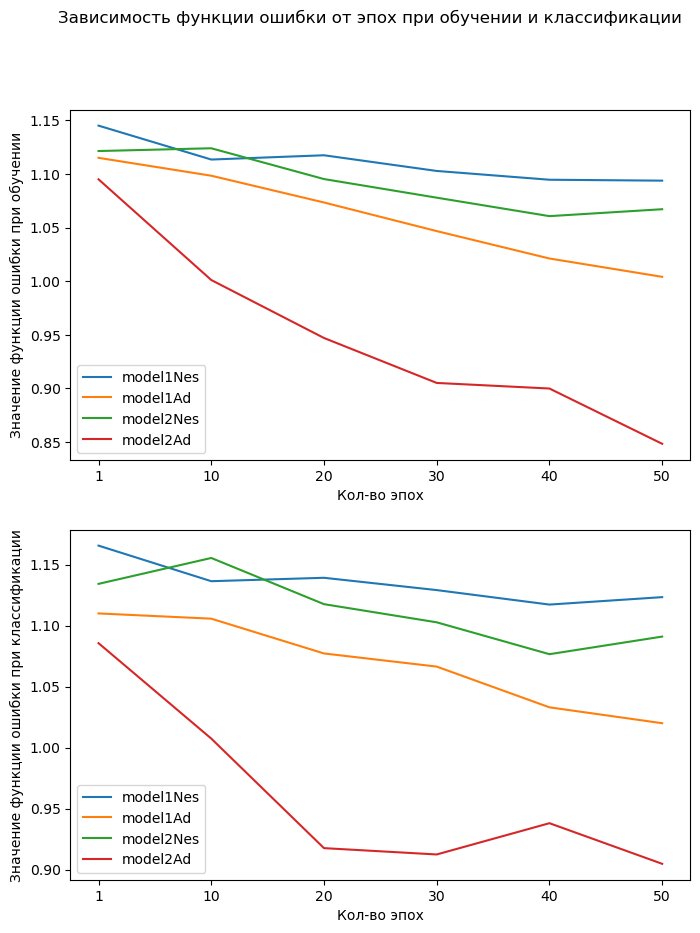

In [17]:
from matplotlib import pyplot as plt
fig,(ax1, ax2) = plt.subplots(2,figsize=(8, 10))
fig.suptitle('Зависимость функции ошибки от эпох при обучении и классификации')
x_lable='Кол-во эпох'
y1_lable='Значение функции ошибки при обучении'
y2_lable='Значение функции ошибки при классификации'
ax2.set_xlabel(x_lable)     
ax1.set_xlabel(x_lable) 
ax2.set_ylabel(y2_lable)
ax1.set_ylabel(y1_lable)

x=volue_of_epochs_train["model1Nes"].index.get_level_values(0).drop_duplicates()
data1Nes = list()
data1Ad = list()
data2Nes = list()
data2Ad = list()
for i in range(0,6):
    data1Nes.append(volue_of_epochs_train["model1Nes"][2*i])
    data1Ad.append(volue_of_epochs_train["model1Ad"][2*i])
    data2Nes.append(volue_of_epochs_train["model2Nes"][2*i])
    data2Ad.append(volue_of_epochs_train["model2Ad"][2*i])
ax1.plot(x, data1Nes, label='model1Nes') 
ax1.plot(x, data1Ad, label='model1Ad')
ax1.plot(x, data2Nes, label='model2Nes')
ax1.plot(x, data2Ad, label='model2Ad')

data1Nes = list()
data1Ad = list()
data2Nes = list()
data2Ad = list()
for i in range(0,6):
    data1Nes.append(volue_of_epochs_test["model1Nes"][2*i])
    data1Ad.append(volue_of_epochs_test["model1Ad"][2*i])
    data2Nes.append(volue_of_epochs_test["model2Nes"][2*i])
    data2Ad.append(volue_of_epochs_test["model2Ad"][2*i])
ax2.plot(x, data1Nes, label='model1Nes') 
ax2.plot(x, data1Ad, label='model1Ad')
ax2.plot(x, data2Nes, label='model2Nes')
ax2.plot(x, data2Ad, label='model2Ad')
ax1.legend()
ax2.legend()

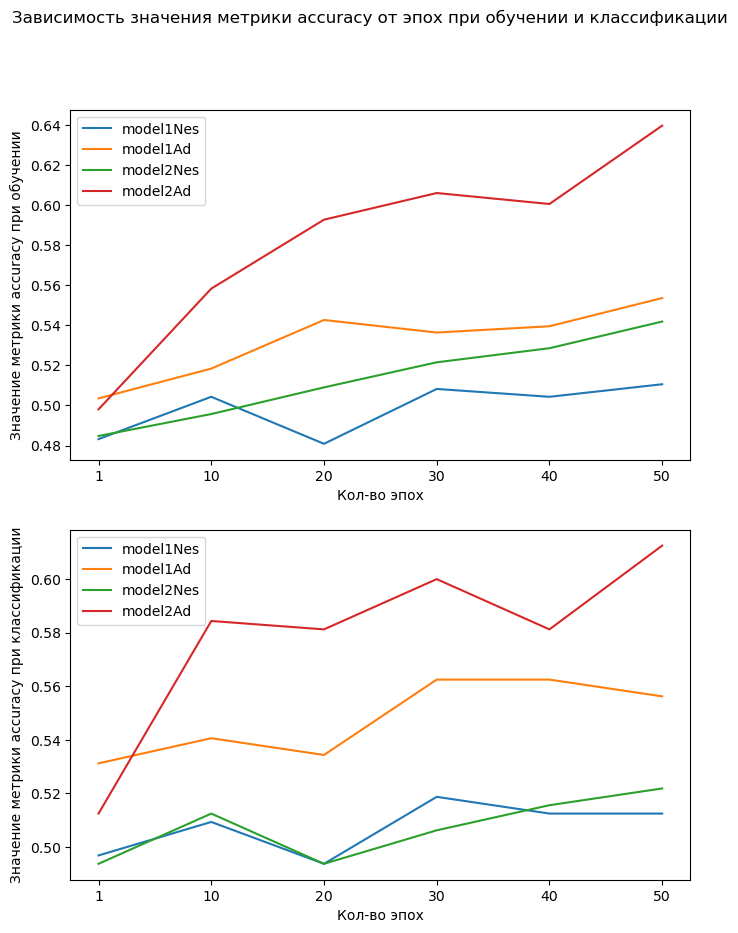

In [18]:
fig,(ax1, ax2) = plt.subplots(2,figsize=(8, 10))
fig.suptitle('Зависимость значения метрики accuracy от эпох при обучении и классификации')
x_lable='Кол-во эпох'
y1_lable='Значение метрики accuracy при обучении'
y2_lable='Значение метрики accuracy при классификации'
ax2.set_xlabel(x_lable)
ax1.set_xlabel(x_lable)
ax2.set_ylabel(y2_lable)
ax1.set_ylabel(y1_lable)

x=volue_of_epochs_train["model1Nes"].index.get_level_values(0).drop_duplicates()
data1Nes = list()
data1Ad = list()
data2Nes = list()
data2Ad = list()
for i in range(0,6):
    data1Nes.append(volue_of_epochs_train["model1Nes"][2*i+1])
    data1Ad.append(volue_of_epochs_train["model1Ad"][2*i+1])
    data2Nes.append(volue_of_epochs_train["model2Nes"][2*i+1])
    data2Ad.append(volue_of_epochs_train["model2Ad"][2*i+1])
ax1.plot(x, data1Nes, label='model1Nes') 
ax1.plot(x, data1Ad, label='model1Ad')
ax1.plot(x, data2Nes, label='model2Nes')
ax1.plot(x, data2Ad, label='model2Ad')
ax1.legend()

data1Nes = list()
data1Ad = list()
data2Nes = list()
data2Ad = list()
for i in range(0,6):
    data1Nes.append(volue_of_epochs_test["model1Nes"][2*i+1])
    data1Ad.append(volue_of_epochs_test["model1Ad"][2*i+1])
    data2Nes.append(volue_of_epochs_test["model2Nes"][2*i+1])
    data2Ad.append(volue_of_epochs_test["model2Ad"][2*i+1])
ax2.plot(x, data1Nes, label='model1Nes') 
ax2.plot(x, data1Ad, label='model1Ad')
ax2.plot(x, data2Nes, label='model2Nes')
ax2.plot(x, data2Ad, label='model2Ad')
ax2.legend()

In [37]:
volue_of_trainSize_train = pd.DataFrame(index=[
    ["80","80", "60","60", "40","40","20","20","5","5"],
    ["loss","accuracy","loss","accuracy","loss","accuracy","loss","accuracy","loss","accuracy"]
])
volue_of_trainSize_test = pd.DataFrame(index=[
    ["80","80", "60","60", "40","40","20","20","5","5"],
    ["loss","accuracy","loss","accuracy","loss","accuracy","loss","accuracy","loss","accuracy"]
])
volue_of_trainSize_train["model1Nes"] = None
volue_of_trainSize_train["model1Ad"] = None
volue_of_trainSize_train["model2Nes"] = None
volue_of_trainSize_train["model2Ad"] = None
volue_of_trainSize_test["model1Nes"] = None
volue_of_trainSize_test["model1Ad"] = None
volue_of_trainSize_test["model2Nes"] = None
volue_of_trainSize_test["model2Ad"] = None
j=0
for i in range(0,5):
    j += 0.2
    if j >=1:
        j=0.95
    x_train, x_test, y_train,y_test = train_test_split(data, target,test_size=j, shuffle=True)
    y_train = tf.keras.utils.to_categorical(y_train, num_classes)
    y_test = tf.keras.utils.to_categorical(y_test, num_classes)
    model1Nes.fit(x_train,y_train, epochs = 30, batch_size = batchSize,verbose = 0)
    model1Ad.fit(x_train,y_train, epochs = 30, batch_size = batchSize,verbose = 0)
    model2Nes.fit(x_train,y_train, epochs = 30, batch_size = batchSize,verbose = 0)
    model2Ad.fit(x_train,y_train, epochs = 30, batch_size = batchSize,verbose = 0)
    volue_of_trainSize_train["model1Nes"][2*i], volue_of_trainSize_train["model1Nes"][2*i+1] = model1Nes.evaluate(x_train,y_train,batch_size=batchSize,verbose = 0)
    volue_of_trainSize_train["model1Ad"][2*i],  volue_of_trainSize_train["model1Ad"][2*i+1]  = model1Ad.evaluate(x_train,y_train,batch_size=batchSize,verbose = 0)
    volue_of_trainSize_train["model2Nes"][2*i], volue_of_trainSize_train["model2Nes"][2*i+1] = model2Nes.evaluate(x_train,y_train,batch_size=batchSize,verbose = 0)
    volue_of_trainSize_train["model2Ad"][2*i],  volue_of_trainSize_train["model2Ad"][2*i+1]  = model2Ad.evaluate(x_train,y_train,batch_size=batchSize,verbose = 0)
    
    volue_of_trainSize_test["model1Nes"][2*i], volue_of_trainSize_test["model1Nes"][2*i+1] = model1Nes.evaluate(x_test,y_test,batch_size=batchSize,verbose = 0)
    volue_of_trainSize_test["model1Ad"][2*i],  volue_of_trainSize_test["model1Ad"][2*i+1]  = model1Ad.evaluate(x_test,y_test,batch_size=batchSize,verbose = 0)
    volue_of_trainSize_test["model2Nes"][2*i], volue_of_trainSize_test["model2Nes"][2*i+1] = model2Nes.evaluate(x_test,y_test,batch_size=batchSize,verbose = 0)
    volue_of_trainSize_test["model2Ad"][2*i],  volue_of_trainSize_test["model2Ad"][2*i+1]  = model2Ad.evaluate(x_test,y_test,batch_size=batchSize,verbose = 0)
print("Зависимость функции ошибки и метрики качества accuracy при обучении")
display(volue_of_trainSize_train)
print("Зависимость функции ошибки и метрики качества accuracy при классификации")
display(volue_of_trainSize_test)

Зависимость функции ошибки и метрики качества accuracy при обучении


model1Nes  model1Ad model2Nes  model2Ad
80 loss       1.07643  1.068862  0.953901  0.806285
   accuracy  0.547303  0.514464   0.58405  0.639562
60 loss      1.022413  1.078401  0.914277  0.654373
   accuracy  0.555787  0.520334  0.584984  0.727841
40 loss      1.061066  1.058472  0.937112  0.639029
   accuracy  0.555556  0.508607  0.607199  0.757433
20 loss      1.064903  1.079069  0.926613  0.570506
   accuracy   0.54232  0.523511  0.592476   0.77116
5  loss      1.041792  1.216633  0.979613  0.528178
   accuracy  0.518987  0.443038  0.544304  0.835443

Зависимость функции ошибки и метрики качества accuracy при классификации


model1Nes  model1Ad model2Nes  model2Ad
80 loss      1.054127  1.056749  0.944109  0.867566
   accuracy  0.546875   0.53125     0.575   0.63125
60 loss      1.128001  1.214232  1.019651  0.877164
   accuracy   0.49375  0.482812  0.560938  0.628125
40 loss      1.101097  1.108374   0.97281  0.815112
   accuracy  0.519792  0.501042  0.571875  0.646875
20 loss      1.146861  1.211399  1.011491  0.841155
   accuracy  0.485156  0.485938  0.551562  0.632812
5  loss      1.120839  1.121024  1.022316  0.912561
   accuracy  0.498684  0.514474  0.553289  0.597368

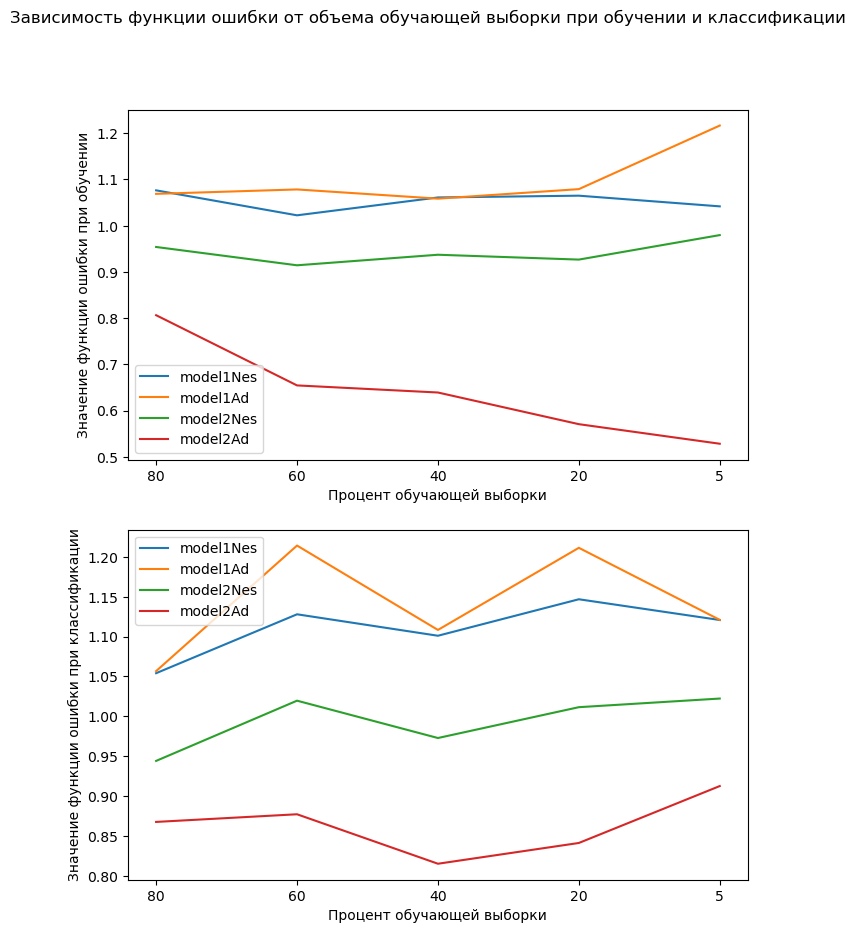

In [38]:
fig,(ax1, ax2) = plt.subplots(2,figsize=(8, 10))
fig.suptitle('Зависимость функции ошибки от объема обучающей выборки при обучении и классификации')
x_lable='Процент обучающей выборки'
y1_lable='Значение функции ошибки при обучении'
y2_lable='Значение функции ошибки при классификации'
ax2.set_xlabel(x_lable)     
ax1.set_xlabel(x_lable) 
ax2.set_ylabel(y2_lable)
ax1.set_ylabel(y1_lable)

x=volue_of_trainSize_train["model1Nes"].index.get_level_values(0).drop_duplicates()
data1Nes = list()
data1Ad = list()
data2Nes = list()
data2Ad = list()
for i in range(0,5):
    data1Nes.append(volue_of_trainSize_train["model1Nes"][2*i])
    data1Ad.append(volue_of_trainSize_train["model1Ad"][2*i])
    data2Nes.append(volue_of_trainSize_train["model2Nes"][2*i])
    data2Ad.append(volue_of_trainSize_train["model2Ad"][2*i])
ax1.plot(x, data1Nes, label='model1Nes') 
ax1.plot(x, data1Ad, label='model1Ad')
ax1.plot(x, data2Nes, label='model2Nes')
ax1.plot(x, data2Ad, label='model2Ad')

data1Nes = list()
data1Ad = list()
data2Nes = list()
data2Ad = list()
for i in range(0,5):
    data1Nes.append(volue_of_trainSize_test["model1Nes"][2*i])
    data1Ad.append(volue_of_trainSize_test["model1Ad"][2*i])
    data2Nes.append(volue_of_trainSize_test["model2Nes"][2*i])
    data2Ad.append(volue_of_trainSize_test["model2Ad"][2*i])
ax2.plot(x, data1Nes, label='model1Nes') 
ax2.plot(x, data1Ad, label='model1Ad')
ax2.plot(x, data2Nes, label='model2Nes')
ax2.plot(x, data2Ad, label='model2Ad')
ax1.legend()
ax2.legend()

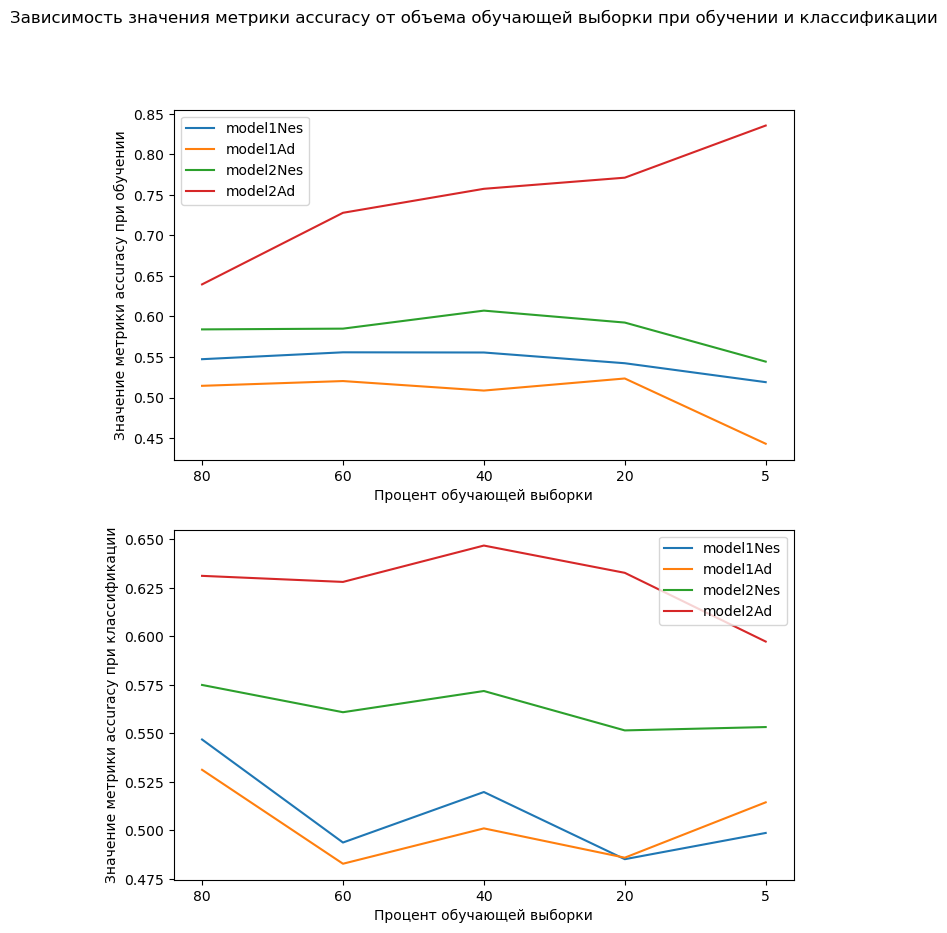

In [39]:
fig,(ax1, ax2) = plt.subplots(2,figsize=(8, 10))
fig.suptitle('Зависимость значения метрики accuracy от объема обучающей выборки при обучении и классификации')
x_lable='Процент обучающей выборки'
y1_lable='Значение метрики accuracy при обучении'
y2_lable='Значение метрики accuracy при классификации'
ax2.set_xlabel(x_lable)
ax1.set_xlabel(x_lable)
ax2.set_ylabel(y2_lable)
ax1.set_ylabel(y1_lable)

x=volue_of_trainSize_train["model1Nes"].index.get_level_values(0).drop_duplicates()
data1Nes = list()
data1Ad = list()
data2Nes = list()
data2Ad = list()
for i in range(0,5):
    data1Nes.append(volue_of_trainSize_train["model1Nes"][2*i+1])
    data1Ad.append(volue_of_trainSize_train["model1Ad"][2*i+1])
    data2Nes.append(volue_of_trainSize_train["model2Nes"][2*i+1])
    data2Ad.append(volue_of_trainSize_train["model2Ad"][2*i+1])
ax1.plot(x, data1Nes, label='model1Nes') 
ax1.plot(x, data1Ad, label='model1Ad')
ax1.plot(x, data2Nes, label='model2Nes')
ax1.plot(x, data2Ad, label='model2Ad')
ax1.legend()

data1Nes = list()
data1Ad = list()
data2Nes = list()
data2Ad = list()
for i in range(0,5):
    data1Nes.append(volue_of_trainSize_test["model1Nes"][2*i+1])
    data1Ad.append(volue_of_trainSize_test["model1Ad"][2*i+1])
    data2Nes.append(volue_of_trainSize_test["model2Nes"][2*i+1])
    data2Ad.append(volue_of_trainSize_test["model2Ad"][2*i+1])
ax2.plot(x, data1Nes, label='model1Nes') 
ax2.plot(x, data1Ad, label='model1Ad')
ax2.plot(x, data2Nes, label='model2Nes')
ax2.plot(x, data2Ad, label='model2Ad')
ax2.legend()

30/30 [==============================] - 0s 2ms/step
Площадь AUC model1Nes - 0.6609349554555034
Площадь AUC model1Ad - 0.7621419676214196
Площадь AUC model2Nes - 0.7006897212376665
Площадь AUC model2Ad - 0.7898745090525913


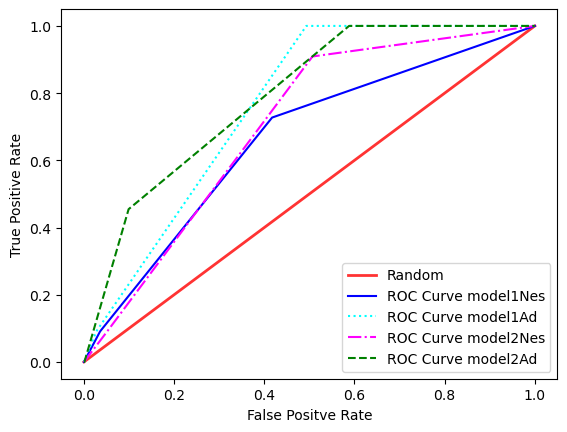

In [89]:
import numpy as np
x_train, x_test, y_train,y_test = train_test_split(data, target,random_state=123,test_size=0.6,shuffle=True)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

model1Nes.fit(x_train,y_train, epochs = 50, batch_size = batchSize, verbose = 0)
model1Ad.fit(x_train,y_train, epochs = 50, batch_size = batchSize, verbose = 0)
model2Nes.fit(x_train,y_train, epochs = 50, batch_size = batchSize, verbose = 0)
model2Ad.fit(x_train,y_train, epochs = 50, batch_size = batchSize, verbose = 0)

    
true_labels = np.argmax(y_test, axis = 1)
pred1 = model1Nes.predict(x_test)
pred1 = np.argmax(pred1, axis =1)
pred2 = model1Ad.predict(x_test)
pred2 = np.argmax(pred2, axis =1)
pred3 = model2Nes.predict(x_test)
pred3 = np.argmax(pred3, axis =1)
pred4 = model2Ad.predict(x_test)
pred4 = np.argmax(pred4, axis =1)

fpr1, tpr1, thresholds1 = roc_curve(true_labels, pred1,pos_label=5)
fpr2, tpr2, thresholds2 = roc_curve(true_labels, pred2,pos_label=5)
fpr3, tpr3, thresholds3 = roc_curve(true_labels, pred3,pos_label=5)
fpr4, tpr4, thresholds4 = roc_curve(true_labels, pred4,pos_label=5)
auc_score1 = auc(fpr1, tpr1)
auc_score2 = auc(fpr2, tpr2)
auc_score3 = auc(fpr3, tpr3)
auc_score4 = auc(fpr4, tpr4)
print("Площадь AUC model1Nes - " + str(auc_score1))
print("Площадь AUC model1Ad - " + str(auc_score2))
print("Площадь AUC model2Nes - " + str(auc_score3))
print("Площадь AUC model2Ad - " + str(auc_score4))
plt.plot([0, 1], [0, 1], lw=2, color='r',label='Random', alpha=.8)
plt.plot(fpr1,tpr1, label="ROC Curve model1Nes",color="blue")
plt.plot(fpr2,tpr2, label="ROC Curve model1Ad",color="cyan", linestyle='dotted')
plt.plot(fpr3,tpr3, label="ROC Curve model2Nes",color="magenta", linestyle='dashdot')
plt.plot(fpr4,tpr4, label="ROC Curve model2Ad",color="green", linestyle='--')
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Confusion matrics для model1Nes


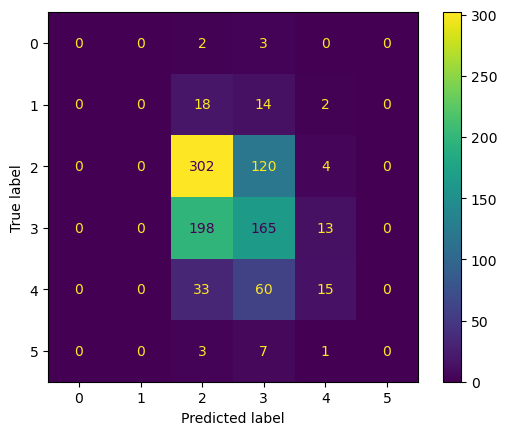

In [92]:
print("Confusion matrics для model1Nes")
cm = confusion_matrix(true_labels, pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Confusion matrics для model1Ad


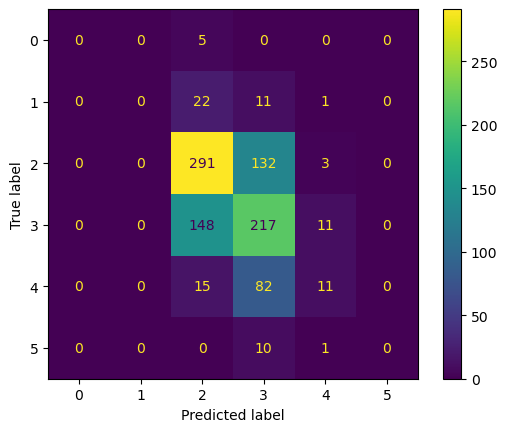

In [93]:
print("Confusion matrics для model1Ad")
cm = confusion_matrix(true_labels, pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Confusion matrics для model2Nes


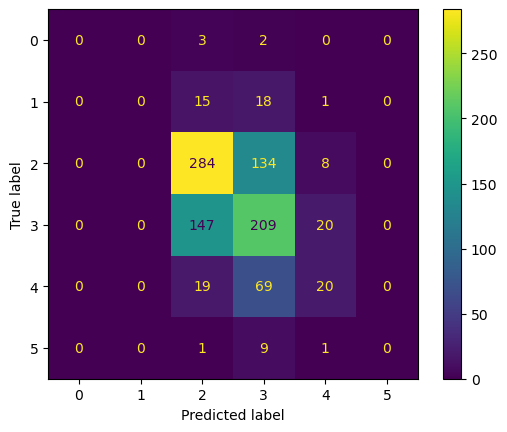

In [94]:
print("Confusion matrics для model2Nes")
cm = confusion_matrix(true_labels, pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Confusion matrics для model2Ad


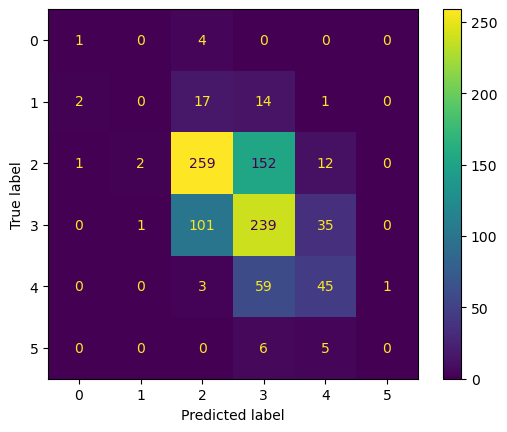

In [95]:
print("Confusion matrics для model2Ad")
cm = confusion_matrix(true_labels, pred4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [53]:
print("Значения метрик для model1Nes")
print(classification_report(true_labels, pred1,zero_division=0))
print("Значения метрик для model1Ad")
print(classification_report(true_labels, pred2,zero_division=0))
print("Значения метрик для model2Nes")
print(classification_report(true_labels, pred3,zero_division=0))
print("Значения метрик для model2Ad")
print(classification_report(true_labels, pred4,zero_division=0))

Значения метрик для model1Nes
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        34
           2       0.56      0.78      0.65       426
           3       0.50      0.43      0.46       376
           4       0.37      0.17      0.23       108
           5       0.00      0.00      0.00        11

    accuracy                           0.53       960
   macro avg       0.24      0.23      0.22       960
weighted avg       0.49      0.53      0.50       960

Значения метрик для model1Ad
              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.00      0.00      0.00        34
           2       0.52      0.99      0.68       426
           3       0.54      0.19      0.28       376
           4       0.77      0.09      0.17       108
           5       0.00      0.00      0.00        11

    accuracy      